In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from google.colab import drive
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
x_path = '/content/drive/MyDrive/Colab Notebooks/X.txt'
with open(x_path, 'r') as f:
    X_text = f.read()

In [4]:
y_path = '/content/drive/MyDrive/Colab Notebooks/y.txt'
with open(y_path, 'r') as f:
    y_text = f.read()

## Problem Statement 1:-
Create a NumPy Implementation for Softmax() and compare it with tensorflow method.

In [23]:
def my_softmax(z):
    N = len(z)
    a = np.zeros(N)
    ez_sum = 0
    for k in range(N):
        ez_sum += np.exp(z[k])
    for j in range(N):
        a[j] = np.exp(z[j])/ez_sum

# def my_softmax(z):
#     ez = np.exp(z)
#     a = ez/np.sum(ez)

    return a

In [24]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


## Problem Statement 2:-

*   Use a neural network to recognize ten handwritten digits, 0-9.
*   This is a multiclass classification task where one of n choices is selected.



In [5]:
# Load the data
X = np.loadtxt(x_path, delimiter=",")
y = np.loadtxt(y_path).reshape(-1, 1).astype(int)

In [6]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  8.560597e-06  1.940

In [7]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [8]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


In [10]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

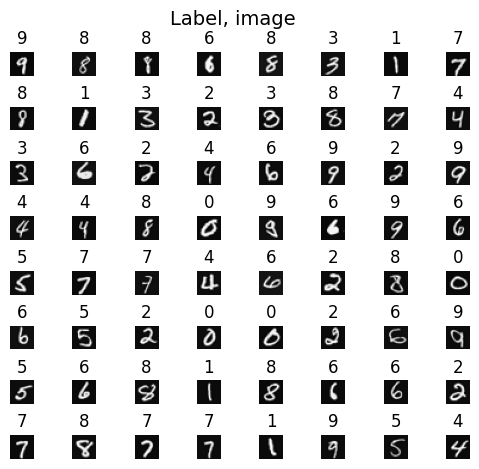

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

widgvis(fig)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## Model representation:-
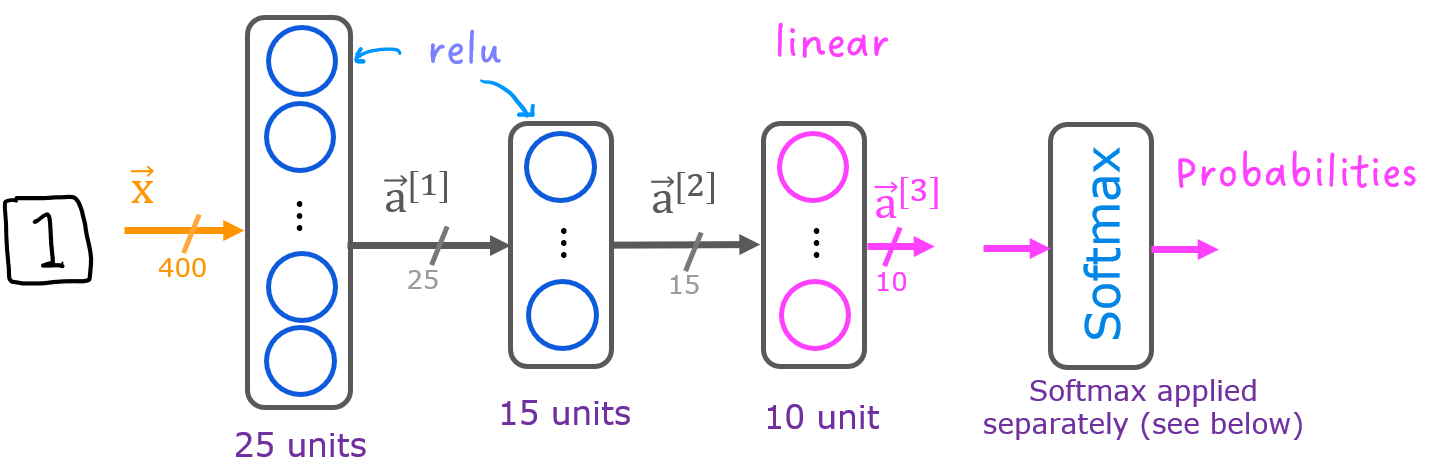

In [12]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name="L1"),
        Dense(units=15, activation='relu', name="L2"),
        Dense(units=10, activation='linear', name="L3")

    ], name = "my_model"
)

In [13]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
[layer1, layer2, layer3] = model.layers

In [15]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


**SparseCategoricalCrossentropy** indicates that the softmax should be included with the loss calculation by adding from_logits=True

In [16]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0767
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8626
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5424
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4352
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3727
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3279
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2933
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2658
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2432
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2234
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2075
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1931
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1805
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1695
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

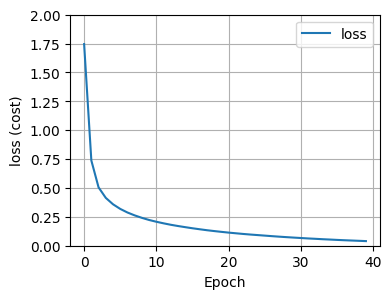

In [17]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

plot_loss_tf(history)

In [18]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

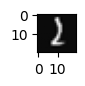

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
 predicting a Two: 
[[-6.3761845  4.123009   7.099325   3.9403222 -4.722833  -8.287938
  -4.076681   2.2740707 -1.1866394 -7.917054 ]]
 Largest Prediction index: 2


In [19]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [20]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.2751998e-06 4.6272196e-02 9.0764850e-01 3.8546070e-02 6.6622256e-06
  1.8850122e-07 1.2712760e-05 7.2834361e-03 2.2875407e-04 2.7314107e-07]]
Total of predictions: 1.000


In [21]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

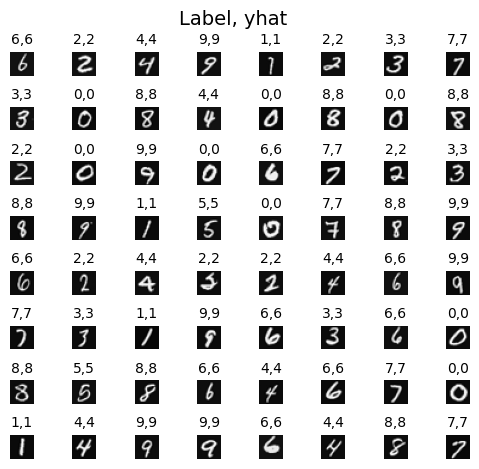

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
widgvis(fig)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()